In [1]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggforce)
library(svglite)
library(extrafont)
library(gridExtra)
library(grid)
library(cowplot)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registering fonts with R


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
data <- read.csv("combined_output.csv", sep = ",") #%>% filter(policy=="FASTEST")
head(data)

,layerSize,device,timestamp,value
,<int>,<int>,<dbl>,<dbl>
1,8,1,0.1,27.0009
2,8,1,0.2,4837.0361
3,8,1,1.1,3850.9369
4,8,1,18.2,4257.2021
5,8,1,52.6,3830.9097
6,8,1,53.0,4165.6494


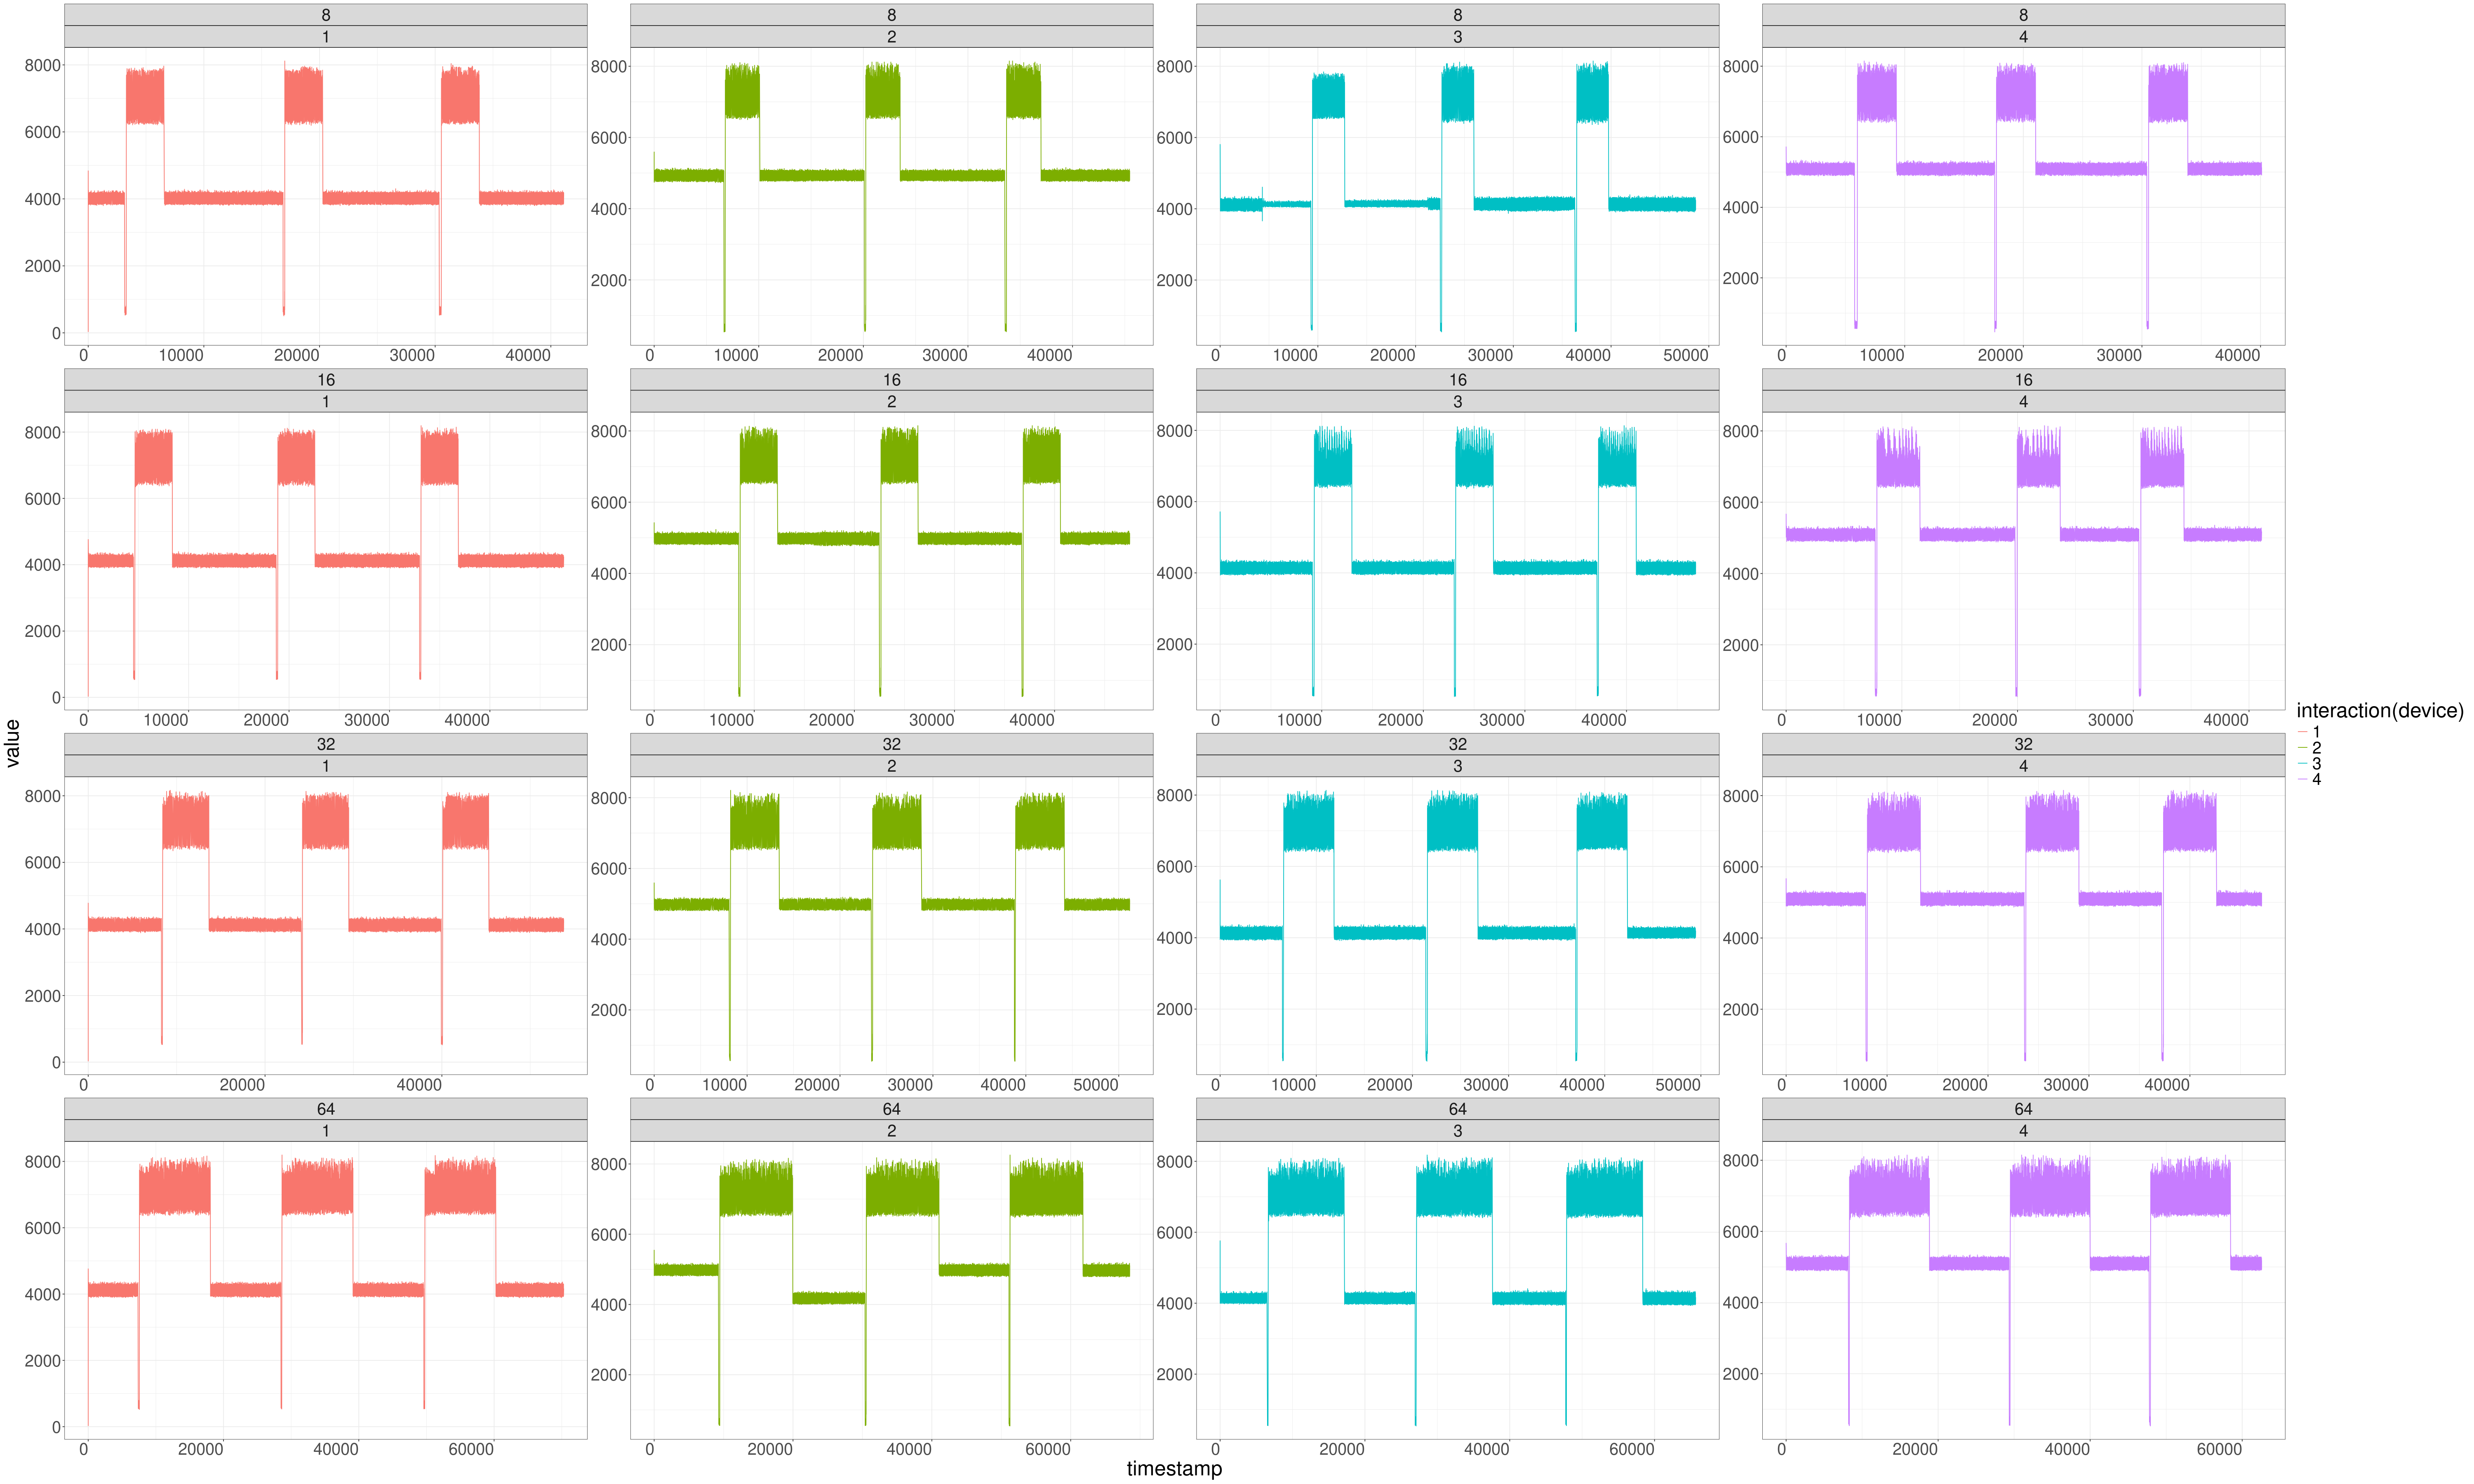

In [3]:
options(repr.plot.width=50, repr.plot.height=30)
ggplot(data=data, aes(x=timestamp, y=value, color=interaction(device))) + 
    #geom_point(size=5,alpha=1)+
    geom_line()+
    facet_wrap(~layerSize+device, scales="free", ncol=4, ) +
    theme_bw()+
    theme( text = element_text(size = 30), axis.text.x = element_text(angle = 0, hjust = 1))


In [5]:
datalow <- data %>% filter(value < 6000)
datahigh <- data %>% filter(value > 6000)
datalow %>% summarize(avgCurrent=mean(value))
datahigh %>% summarize(avgCurrent=mean(value))

datalow <- data %>% group_by(device) %>% filter(value < 6000)
datahigh <- data %>% group_by(device) %>% filter(value > 6000)
datalow %>% summarize(avgCurrent=mean(value))
datahigh %>% summarize(avgCurrent=mean(value))

avgCurrent
<dbl>
4443.255


avgCurrent
<dbl>
7138.266


device,avgCurrent
<int>,<dbl>
1,4019.044
2,4848.105
3,4089.183
4,5001.470


device,avgCurrent
<int>,<dbl>
1,7127.478
2,7204.389
3,7118.762
4,7111.167


In [34]:
data <- read.csv("combined_logs.csv", sep = ",")%>%
  na.omit()
head(data)

,layerSize,device,iteration,dur
,<int>,<int>,<int>,<int>
1,8,1,0,208
2,8,1,1,207
3,8,1,2,207
4,8,1,3,208
5,8,1,4,208
6,8,1,5,208


layerSize,avgDur
<int>,<dbl>
8,207.3197
16,548.0360
32,1690.1278
64,5801.0660


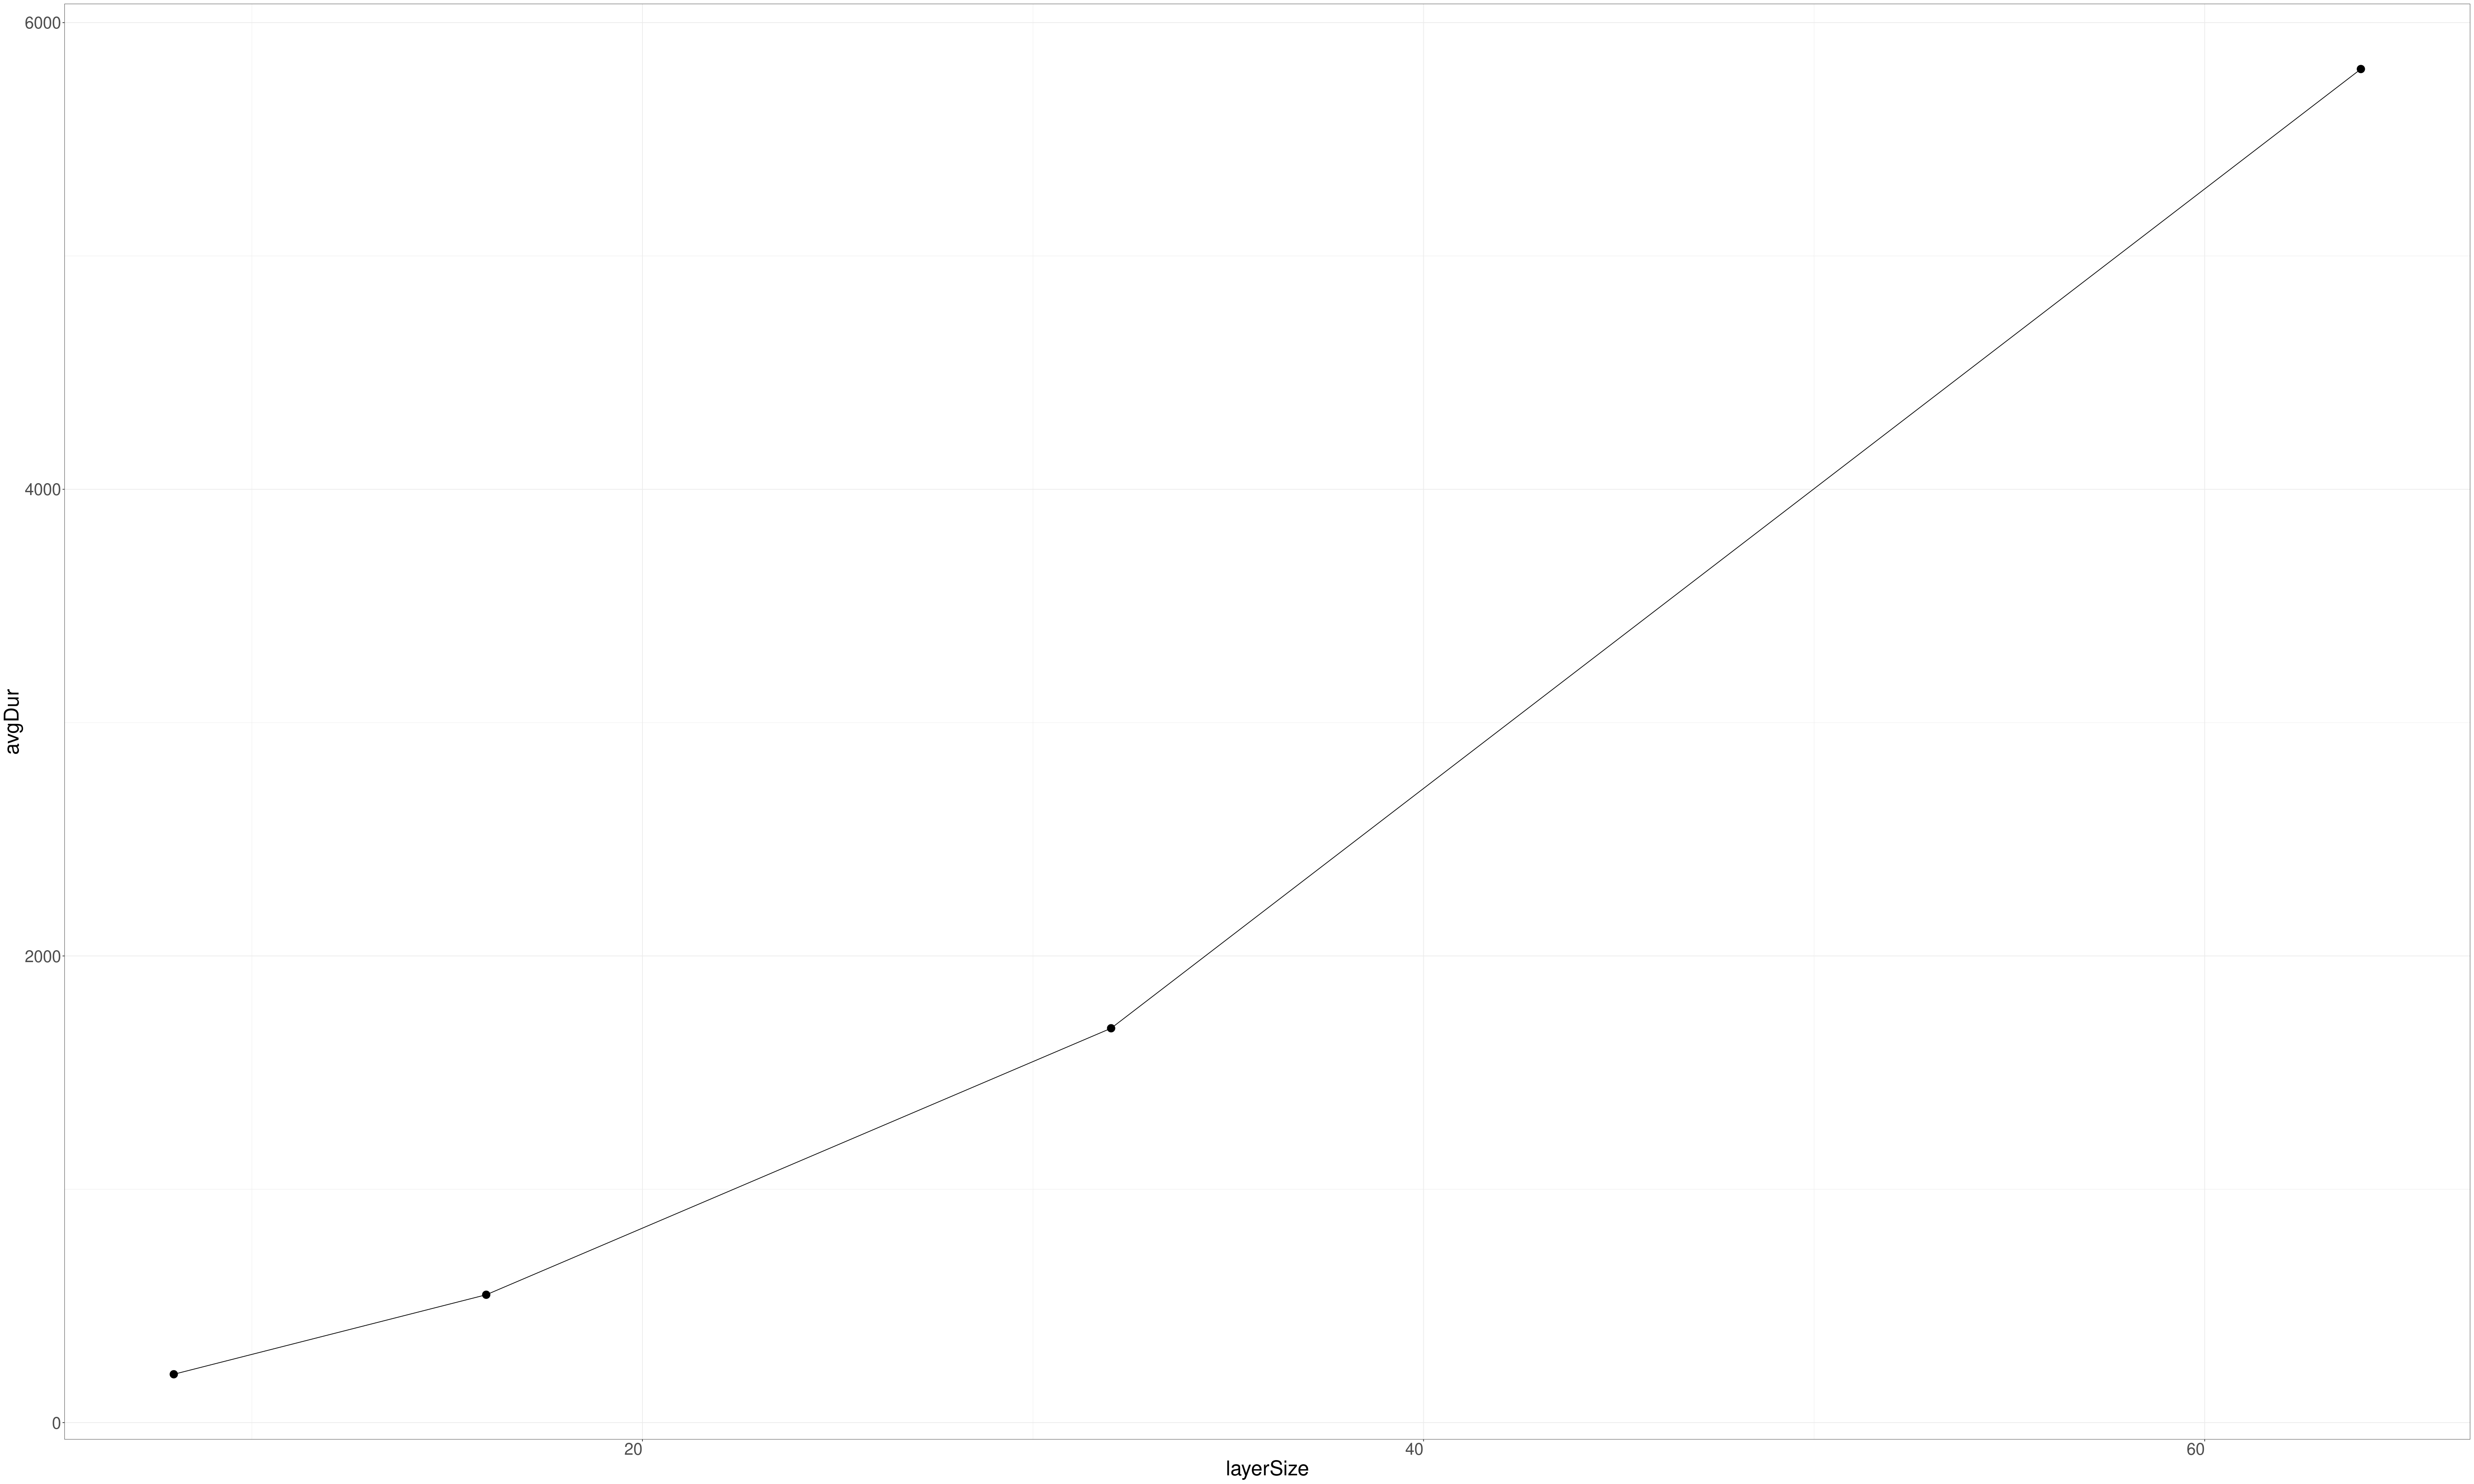

In [40]:

datagroup <- data %>% group_by(layerSize) %>% summarize(avgDur=mean(dur))
datagroup
options(repr.plot.width=50, repr.plot.height=30)
ggplot(data=datagroup, aes(x=layerSize, y=avgDur)) + 
    geom_point(size=5,alpha=1)+
    geom_line() +
    theme_bw()+
    theme( text = element_text(size = 30), axis.text.x = element_text(angle = 0, hjust = 1))
